### Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Upload

In [83]:
df = pd.read_csv('train.csv')
df.drop(columns = 'id', inplace = True)
df.head()

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15.0,0.0
1,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15.0,0.0
2,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14.0,0.0
3,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22.0,1.0
4,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4.0,0.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cancel             1048575 non-null  int64  
 1   year               1048575 non-null  int64  
 2   zip.code           1047624 non-null  float64
 3   house.color        1047630 non-null  object 
 4   ni.age             1047573 non-null  float64
 5   len.at.res         1047608 non-null  float64
 6   credit             1047668 non-null  object 
 7   coverage.type      1047595 non-null  object 
 8   dwelling.type      1047582 non-null  object 
 9   premium            1047618 non-null  float64
 10  sales.channel      1047550 non-null  object 
 11  ni.gender          1047615 non-null  object 
 12  ni.marital.status  1047581 non-null  float64
 13  n.adults           1047644 non-null  float64
 14  n.children         1047637 non-null  float64
 15  tenure             1047595 non-n

### Data Cleaning

**1. Response variable: cancel**

In [11]:
df['cancel'].value_counts()

 0    741064
 2    228777
 1     75282
-1      3452
Name: cancel, dtype: int64

$\space\space\space\space\space\space\space\space$ ***What does cancel = -1 indicate?*** *Since data is so low for cancel = -1, should we drop these records?*

In [12]:
df = df[df['cancel'] != -1]
df['cancel'].value_counts()

0    741064
2    228777
1     75282
Name: cancel, dtype: int64

### Missing Data

In [13]:
df.isnull().sum().sum()

14466

In [25]:
df.isnull().sum()

cancel                  0
year                    0
zip.code              944
house.color           939
ni.age               1001
len.at.res            960
credit                905
coverage.type         979
dwelling.type         990
premium               955
sales.channel        1020
ni.gender             957
ni.marital.status     992
n.adults              929
n.children            935
tenure                978
claim.ind             982
dtype: int64

**1. Impute missing Credit level records**

In [15]:
df['credit'].drop_duplicates()

0         high
1       medium
14         low
2557       NaN
Name: credit, dtype: object

In [14]:
df['credit'].value_counts()

high      645327
medium    227752
low       171139
Name: credit, dtype: int64

In [16]:
df[df['credit'].isnull()]

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
2557,2,2014,50051.0,blue,44.0,12.0,NaN,C,House,890.594274,Broker,F,1.0,4.0,0.0,11.0,0.0
4463,0,2015,85004.0,blue,30.0,16.0,NaN,A,Tenant,878.590863,Broker,M,0.0,1.0,0.0,8.0,0.0
7678,0,2013,50014.0,red,43.0,15.0,NaN,C,House,893.971163,Phone,F,1.0,1.0,7.0,16.0,0.0
12812,0,2015,50001.0,blue,34.0,9.0,NaN,A,House,874.989911,Broker,M,1.0,4.0,1.0,4.0,0.0
13206,0,2016,80027.0,white,40.0,11.0,NaN,C,Condo,896.331416,Broker,F,0.0,3.0,0.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041049,0,2013,20129.0,blue,57.0,14.0,NaN,C,House,950.723249,Broker,F,1.0,3.0,2.0,11.0,0.0
1046459,0,2016,80038.0,blue,42.0,16.0,NaN,B,Condo,923.404940,Phone,F,0.0,2.0,0.0,15.0,0.0
1046554,0,2016,50021.0,white,38.0,15.0,NaN,B,House,917.345739,Broker,M,1.0,1.0,3.0,9.0,0.0
1047598,0,2016,50047.0,white,58.0,9.0,NaN,C,House,903.992003,Broker,F,1.0,3.0,3.0,8.0,0.0


**Check price of policy: premium across the 3 coverage types**

In [19]:
df['coverage.type'].value_counts()

C    438083
A    355505
B    250556
Name: coverage.type, dtype: int64

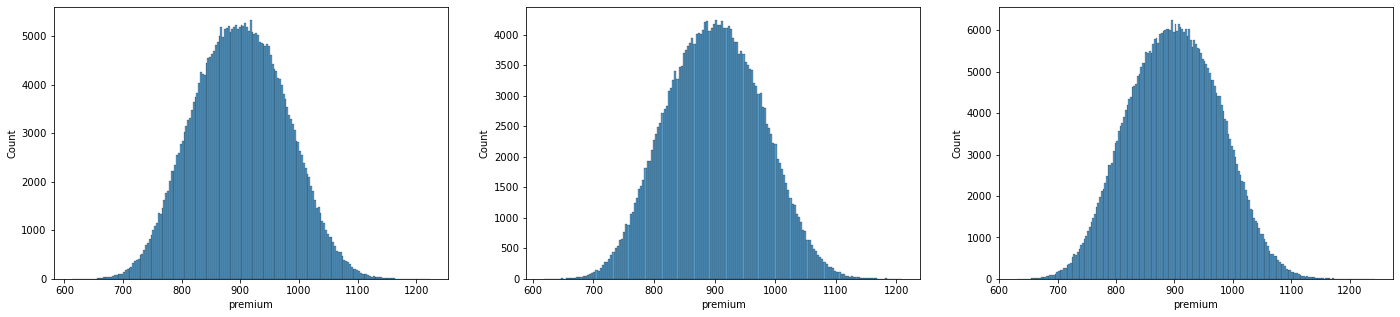

In [20]:
ctype = ['A','B','C']
fog, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (24,5))
for i, c in enumerate(ctype):
    sns.histplot(x = 'premium', data = df[df['coverage.type'] == c], ax = ax[i%3])

*Premiums are equal across the 3 coverage types.*

In [21]:
df['year'].value_counts()

2016    302342
2015    274920
2014    246816
2013    221045
Name: year, dtype: int64

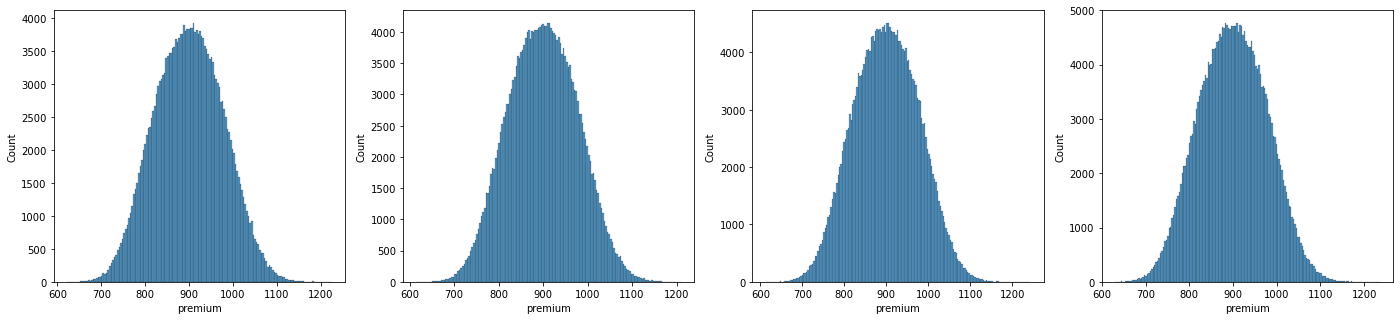

In [22]:
ytype = [2013, 2014, 2015, 2016]
fog, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (24,5))
for i, y in enumerate(ytype):
    sns.histplot(x = 'premium', data = df[df['year'] == y], ax = ax[i%4])

*Premiums are equal across the 4 years*

**Check credit across coverage type**

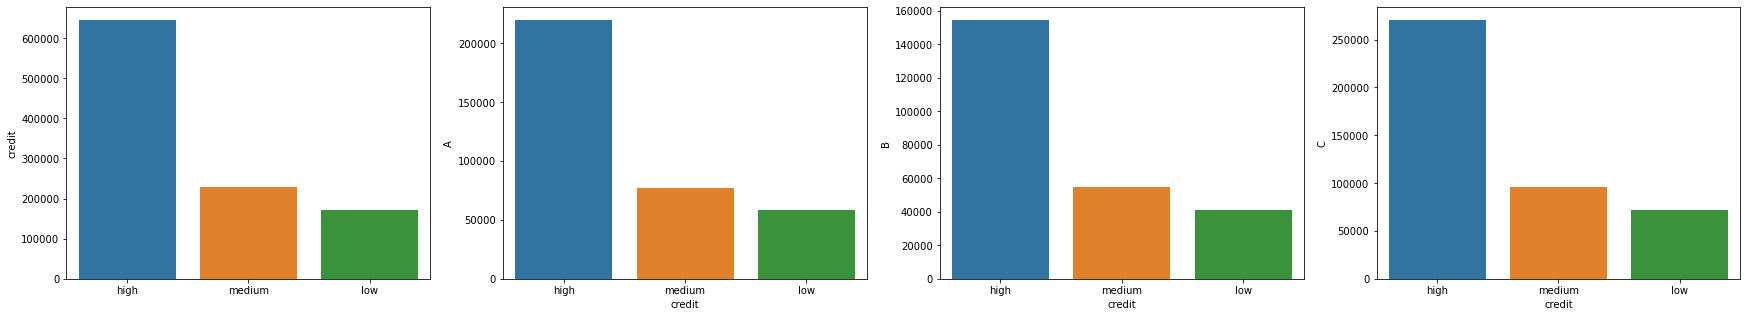

In [48]:
dt = pd.DataFrame(df['credit'].value_counts())
dt2 = pd.crosstab(df['credit'],df['coverage.type'])
order = ['high','medium','low']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'credit', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 'A', data = dt2, order = order, ax = ax[1])
sns.barplot(x = dt2.index, y = 'B', data = dt2, order = order, ax = ax[2])
sns.barplot(x = dt2.index, y = 'C', data = dt2, order = order,ax = ax[3])
plt.show()

**Check credit across years**

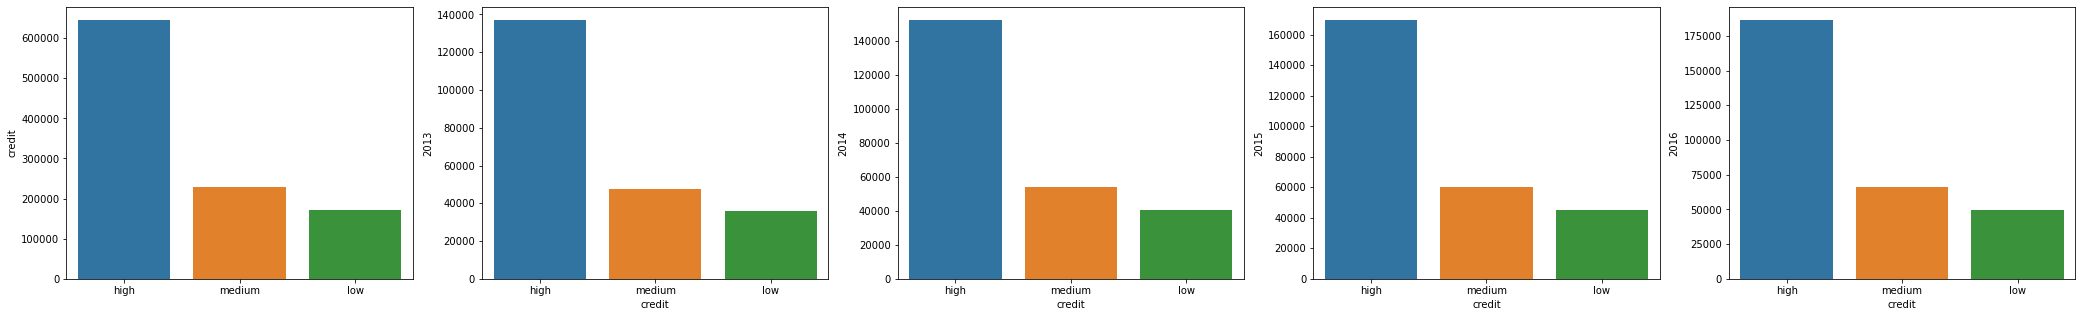

In [49]:
dt3 = pd.crosstab(df['credit'],df['year'])

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (36,5))
sns.barplot(x = dt.index, y = 'credit', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt3.index, y = 2013, data = dt3, order = order, ax = ax[1])
sns.barplot(x = dt3.index, y = 2014, data = dt3, order = order, ax = ax[2])
sns.barplot(x = dt3.index, y = 2015, data = dt3, order = order,ax = ax[3])
sns.barplot(x = dt3.index, y = 2016, data = dt3, order = order,ax = ax[4])
plt.show()

**Check credit across dwelling.type**

In [50]:
df['dwelling.type'].value_counts()

House     585953
Condo     251233
Tenant    206947
Name: dwelling.type, dtype: int64

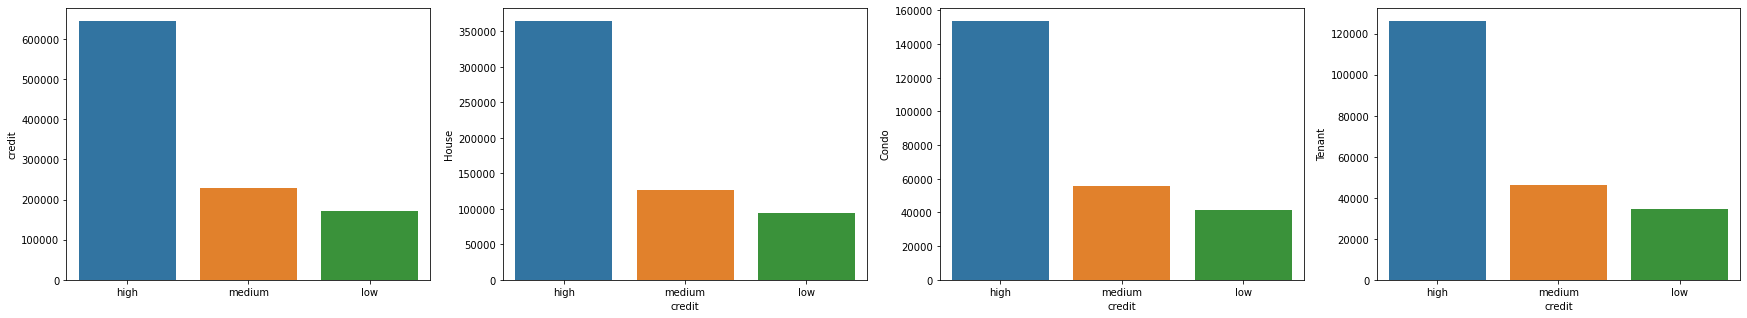

In [51]:
dt4 = pd.crosstab(df['credit'],df['dwelling.type'])

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'credit', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt4.index, y = 'House', data = dt4, order = order, ax = ax[1])
sns.barplot(x = dt4.index, y = 'Condo', data = dt4, order = order, ax = ax[2])
sns.barplot(x = dt4.index, y = 'Tenant', data = dt4, order = order,ax = ax[3])
plt.show()

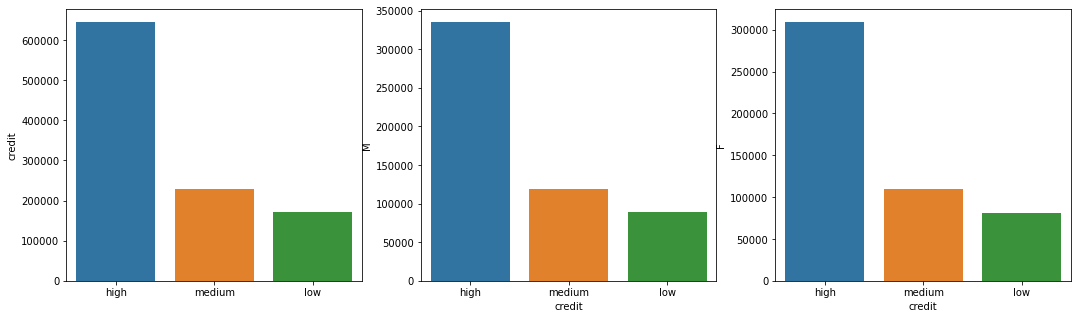

In [52]:
dt5 = pd.crosstab(df['credit'],df['ni.gender'])

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))
sns.barplot(x = dt.index, y = 'credit', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt5.index, y = 'M', data = dt5, order = order, ax = ax[1])
sns.barplot(x = dt5.index, y = 'F', data = dt5, order = order, ax = ax[2])
plt.show()

In [53]:
df['ni.marital.status'].value_counts()

1.0    741304
0.0    302827
Name: ni.marital.status, dtype: int64

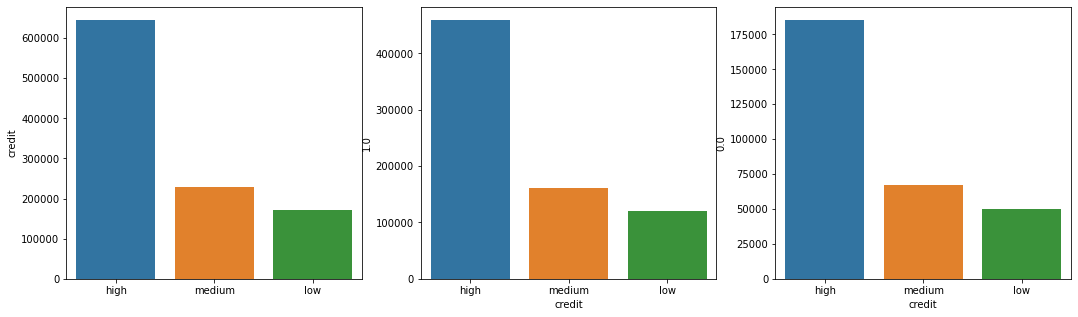

In [55]:
dt6 = pd.crosstab(df['credit'],df['ni.marital.status'])

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))
sns.barplot(x = dt.index, y = 'credit', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt6.index, y = 1.0, data = dt6, order = order, ax = ax[1])
sns.barplot(x = dt6.index, y = 0.0, data = dt6, order = order, ax = ax[2])
plt.show()